# MNIST analysis on KNN

In this notebook we build a simple KNN model to predict the MNIST database. The goal is to find the best hyperparameters using this model.

The KNN model predicts, among $C$ classes, the one with highest value. Let $k$ be the number of *closest* neighbors to a training example $x$. We predict $x$ belonging to a class $c$ if the mean value of closest points to $x$ is highest for this class.
$$
    {\hat y} = \frac{1}{k}\sum_{x_i \in N_k(x)} y_i
$$

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Getting and parsing the data

We first get the training data obtained from [here](https://www.kaggle.com/c/digit-recognizer), download it and read it as a pandas dataframe. Afterwards, we get transform the values as a numpy array. Finally, we chose the pixels and training examples.

In [138]:
mnist = pd.read_csv("train.txt").values
mnist_x, mnist_y = mnist[:, 1:], mnist[:,0]
print(mnist_x.shape, mnist_y.shape)

(42000, 784) (42000,)


In [135]:
mnist_y

array([1, 0, 1, ..., 7, 6, 9])

The digits do not represent importance in the model. Number 1 is not a lower priority than, say, 8. In order to *erase*
Making a OneHotEncoder for the y-labels

In [136]:
ohe = OneHotEncoder(sparse=False)
mnist_y = ohe.fit_transform(mnist_y.reshape(-1,1))

In [137]:
mnist_y

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

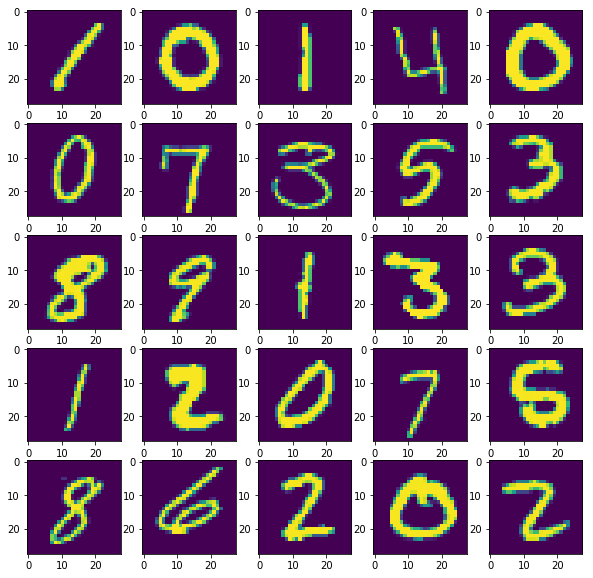

In [139]:
nfigs = 5
fig = plt.figure(figsize=(10,10))
for i in range(nfigs ** 2):
    ax = fig.add_subplot(nfigs, nfigs, i+1)
    ax.imshow(mnist_x[i].reshape(28, 28))
    
plt.savefig("./mnist_25.png")

In [6]:
grid_params = {"n_neighbors": range(4, 21),
               "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, grid_params, verbose=2, n_jobs=-1)
grid_search.fit(mnist_x, mnist_y)

Fitting 3 folds for each of 34 candidates, totalling 102 fits
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=4, weights=distance .................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=14.3min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=14.4min
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=4, weights=distance, total=14.4min
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 171.7min


[CV] ................... n_neighbors=8, weights=uniform, total=14.0min
[CV] n_neighbors=9, weights=distance .................................
[CV] ................... n_neighbors=8, weights=uniform, total=14.0min
[CV] n_neighbors=9, weights=distance .................................
[CV] ................... n_neighbors=9, weights=uniform, total=14.1min
[CV] n_neighbors=9, weights=distance .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] ................... n_neighbors=9, weights=uniform, total=14.1min
[CV] n_neighbors=10, weights=uniform .................................
[CV] .................. n_neighbors=8, weights=distance, total=14.1min
[CV] n_neighbors=10, weights=distance ................................
[CV] .

[CV] .................. n_neighbors=18, weights=uniform, total=14.8min
[CV] n_neighbors=19, weights=uniform .................................
[CV] ................. n_neighbors=17, weights=distance, total=14.8min
[CV] n_neighbors=19, weights=uniform .................................
[CV] .................. n_neighbors=18, weights=uniform, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] ................. n_neighbors=18, weights=distance, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] .................. n_neighbors=18, weights=uniform, total=14.9min
[CV] n_neighbors=19, weights=distance ................................
[CV] ................. n_neighbors=18, weights=distance, total=15.3min
[CV] n_neighbors=20, weights=uniform .................................
[CV] ................. n_neighbors=18, weights=distance, total=15.4min
[CV] n_neighbors=20, weights=uniform .................................
[CV] .

[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed: 544.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(4, 21), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [20]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [32]:
grid_search.best_score_

0.96521428571428569

In [127]:
scores  = {"uniform":[], "distance":[]}
neighbors = range(4, 21)
for par, tscore in zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]):
    scores[par["weights"]].append(tscore)
    print(par, tscore)

{'n_neighbors': 4, 'weights': 'uniform'} 0.946785714286
{'n_neighbors': 4, 'weights': 'distance'} 0.965214285714
{'n_neighbors': 5, 'weights': 'uniform'} 0.960571428571
{'n_neighbors': 5, 'weights': 'distance'} 0.960571428571
{'n_neighbors': 6, 'weights': 'uniform'} 0.947928571429
{'n_neighbors': 6, 'weights': 'distance'} 0.962666666667
{'n_neighbors': 7, 'weights': 'uniform'} 0.9575
{'n_neighbors': 7, 'weights': 'distance'} 0.957523809524
{'n_neighbors': 8, 'weights': 'uniform'} 0.947595238095
{'n_neighbors': 8, 'weights': 'distance'} 0.95930952381
{'n_neighbors': 9, 'weights': 'uniform'} 0.954785714286
{'n_neighbors': 9, 'weights': 'distance'} 0.954833333333
{'n_neighbors': 10, 'weights': 'uniform'} 0.945833333333
{'n_neighbors': 10, 'weights': 'distance'} 0.956738095238
{'n_neighbors': 11, 'weights': 'uniform'} 0.95169047619
{'n_neighbors': 11, 'weights': 'distance'} 0.95180952381
{'n_neighbors': 12, 'weights': 'uniform'} 0.944261904762
{'n_neighbors': 12, 'weights': 'distance'} 0.9

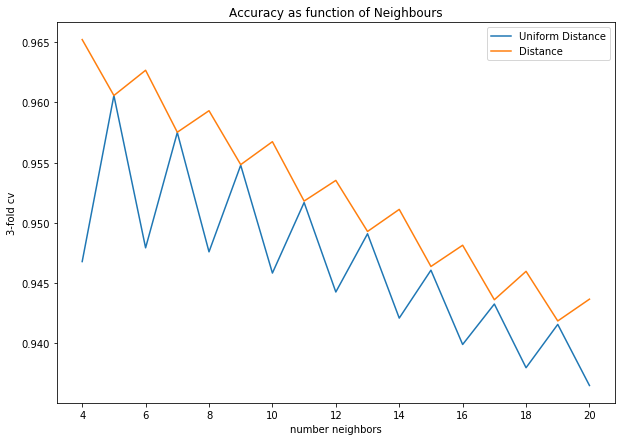

In [142]:
plt.figure(figsize=(10,7))
plt.plot(neighbors, scores["uniform"], label="Uniform Distance")
plt.plot(neighbors, scores["distance"], label="Distance")
plt.xlabel("number neighbors")
plt.ylabel("3-fold cv")
plt.title("Accuracy as function of Neighbours")
plt.legend()
plt.savefig("KNN_3fold_accuracy.png")
plt.show()

In [66]:
preds_train = grid_search.predict(mnist_x)
notify("Model Status", "Model is done predicting")

In [87]:
preds_train_num = preds_train @ ohe.active_features_

In [112]:
mnist[:,0] == preds_train_num

True

In [40]:
## Saving the model for future test comparison
from sklearn.externals import joblib
joblib.dump(grid_search, "knn_mnist.pkl")

['knn_mnist.pkl']

## Predicting the test set

In [22]:
test = pd.read_csv("test.txt").values
preds = grid_search.predict(test)
pred_num = preds @ ohe.active_features_

In [55]:
pred_num

array([ 2.,  0.,  9., ...,  3.,  9.,  2.])

In [149]:
preds.shape

(28000, 10)

In [150]:
ohe.active_features_.shape

(10,)

In [64]:
pd.DataFrame({
    "ImageId": range(1, len(preds) + 1),
    "Label": pred_num
}, dtype=int).to_csv("pred.txt", index=False)

In [43]:
preds = grid_search.predict(test)

In [145]:
import os

def notify(title, text):
    os.system("""
              osascript -e 'display notification "{}" with title "{}"'
              """.format(text, title))